In [2]:
# 1. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

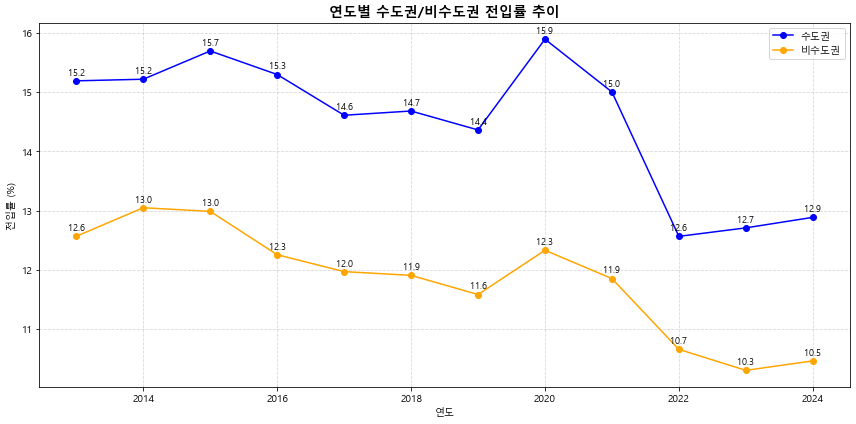

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. 데이터 불러오기
file_path = 'data/연도별_시군구_전입률_전출률_2013_2024 - 완료.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# 2. 수도권 구분
capital_region = ['서울특별시', '경기도', '인천광역시']
df['권역'] = df['시도'].apply(lambda x: '수도권' if x in capital_region else '비수도권')

# 3. 연도별 평균 전입률 계산
df_grouped = df.groupby(['연도', '권역'])['전입률'].mean().reset_index()
df_pivot = df_grouped.pivot(index='연도', columns='권역', values='전입률')

# 4. 선그래프
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['수도권'], marker='o', label='수도권', color='blue')
plt.plot(df_pivot.index, df_pivot['비수도권'], marker='o', label='비수도권', color='orange')

# 5. 마커 위 수치 (검정색)
for x, y in zip(df_pivot.index, df_pivot['수도권']):
    plt.text(x, y + 0.1, f'{y:.1f}', ha='center', fontsize=9, color='black')
for x, y in zip(df_pivot.index, df_pivot['비수도권']):
    plt.text(x, y + 0.1, f'{y:.1f}', ha='center', fontsize=9, color='black')

# 6. 스타일 설정
plt.title('연도별 수도권/비수도권 전입률 추이', fontsize=14, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('전입률 (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

# 7. 출력
plt.show()
